In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataframe = pd.read_csv("/content/Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
# Function to handle rating conversion
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)


In [4]:
# Apply function to the 'rate' column
dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

# Dataset information
dataframe.info()


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                        800.0          Buffet  
1                        800.0          Buffet  
2                        800.0          Buffet  
3                        300.0          Buffet  
4                        600.0          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148

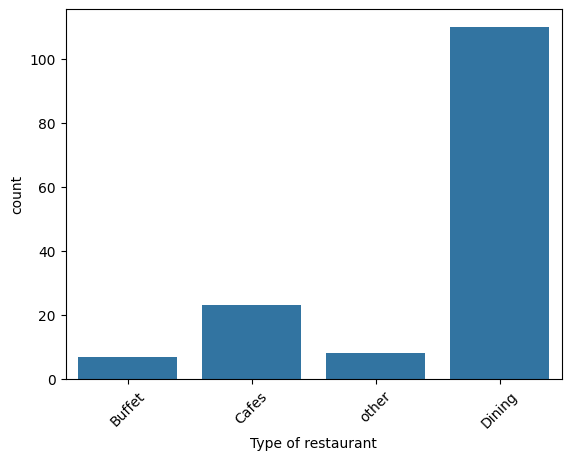

In [5]:
# Count plot for restaurant type
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")
plt.xticks(rotation=45)
plt.show()

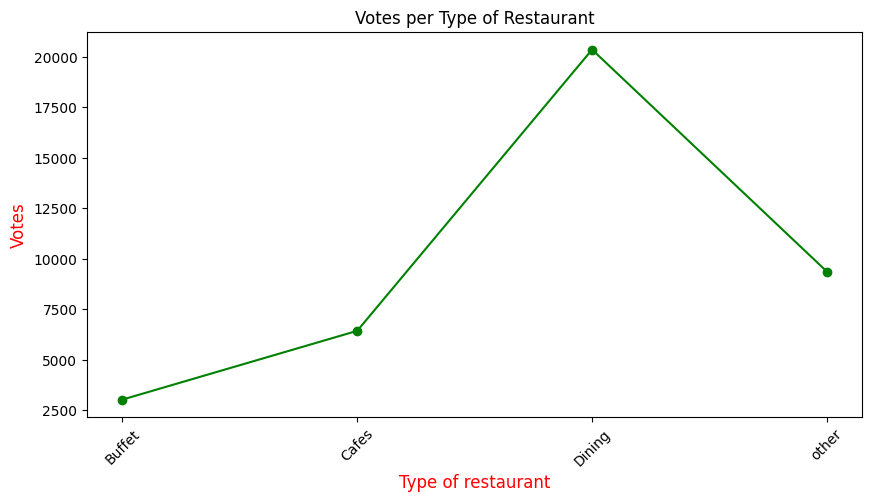

In [6]:
# Grouped data by type of restaurant and votes
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

# Line plot for votes by restaurant type
plt.figure(figsize=(10,5))
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', color='red', size=12)
plt.ylabel('Votes', color='red', size=12)
plt.xticks(rotation=45)
plt.title("Votes per Type of Restaurant")
plt.show()

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


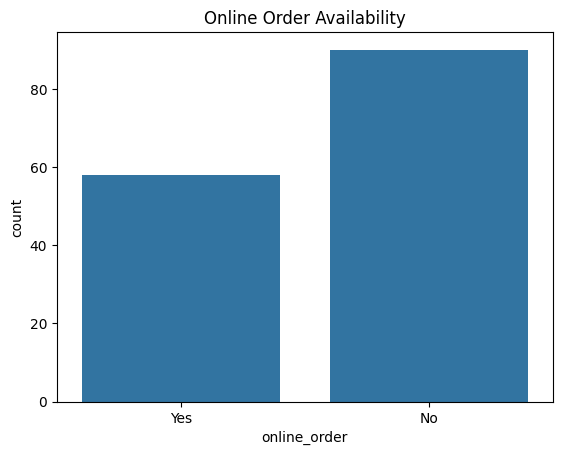

In [7]:
# Restaurant with maximum votes
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

# Count plot for online order availability
sns.countplot(x=dataframe['online_order'])
plt.title("Online Order Availability")
plt.show()

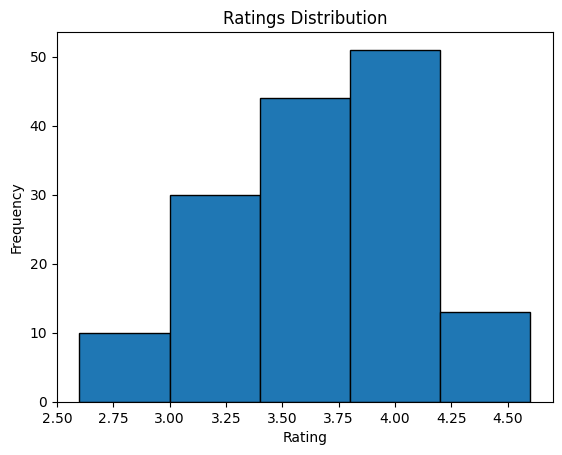

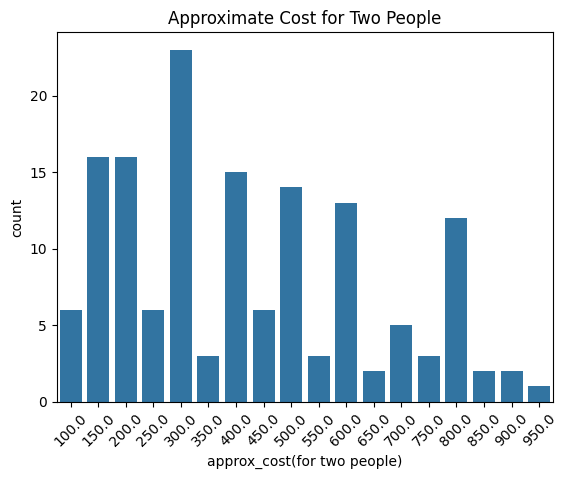

In [8]:

# Histogram for ratings distribution
plt.hist(dataframe['rate'], bins=5, edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Count plot for approximate cost
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)
sns.countplot(x=dataframe['approx_cost(for two people)'])
plt.xticks(rotation=45)
plt.title("Approximate Cost for Two People")
plt.show()

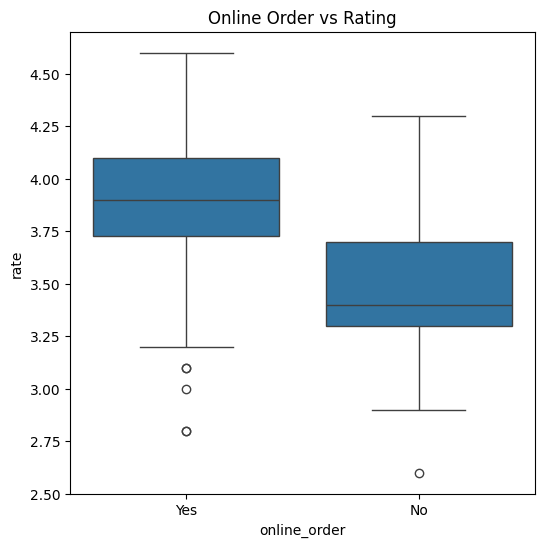

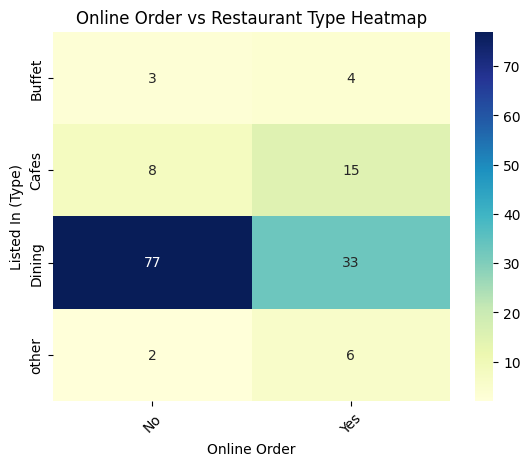

In [9]:
# Boxplot for online order vs ratings
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=dataframe)
plt.title("Online Order vs Rating")
plt.show()

# Heatmap for online order and restaurant type
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Online Order vs Restaurant Type Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.xticks(rotation=45)
plt.show()